In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab_Notebooks/ufo_reports
!apt-get install libgeos-dev
!pip install -U pip
!pip install -U matplotlib
!pip install -U numpy
!pip install -U pyproj
!pip install -U basemap
!pip install datashader hvplot holoviews

Mounted at /content/drive
/content/drive/MyDrive/Colab_Notebooks/ufo_reports
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.9.1-1~focal0).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 56.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 48.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.6/860.6 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 53.8 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.6.0
    Uninstalling pyproj-3.6.0:
      Successfully uninstalled pyproj-3.6.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.0
    Uninstalling numpy-1.25.0:
      Successfully uninstalled numpy-1.25.0
ERROR: pip's depen

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 67.7 MB/s eta 0:00:00
  Created wheel for datashape: filename=datashape-0.5.2-py3-none-any.whl size=59421 sha256=e41c45008f59fb96adae1dff8f5cd0403b945073641403f05418a9a62de34d55
  Stored in directory: /root/.cache/pip/wheels/35/c6/63/a3c12ecc9fdea10a593271de5c56481b427ad4049b90a176e1
Successfully built datashape
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3


In [ ]:
import pandas as pd
import matplotlib.colors as mcolors
import random
from datetime import datetime, time
from collections import Counter
import string

df = pd.read_csv("processed_reports.csv")
print("{} Columns, {} Rows.\n".format(df.shape[1], df.shape[0]))
print(df.head(), "\n")

import pickle

with open("assets.pickle", "rb") as file:
  year_colormap, year_norm, month_colors, months, weekday_colors, weekdays, hours, shape_colors, seconds_colormap, seconds_norm = pickle.load(file = file)

886 Columns, 85988 Rows.

   Unnamed: 0             datetime  year month    weekday  hour  seconds  \
0           0  1949-10-10 20:30:00  1949   Oct     Monday    20   2700.0   
1           1  1949-10-10 21:00:00  1949   Oct     Monday    21   7200.0   
2           2  1955-10-10 17:00:00  1955   Oct     Monday    17     20.0   
3           3  1956-10-10 21:00:00  1956   Oct  Wednesday    21     20.0   
4           4  1960-10-10 20:00:00  1960   Oct     Monday    20    900.0   

      shape   latitude   longitude  ... yellow yellowish yelloworange yes  \
0  cylinder  29.883056  -97.941111  ...      0         0            0   0   
1     light  29.384210  -98.581082  ...      0         0            0   0   
2    circle  53.200000   -2.916667  ...      0         0            0   0   
3    circle  28.978333  -96.645833  ...      0         0            0   0   
4     light  21.418056 -157.803611  ...      0         0            0   0   

  york young zag zig zigzag  zoom  
0    0     0   0  

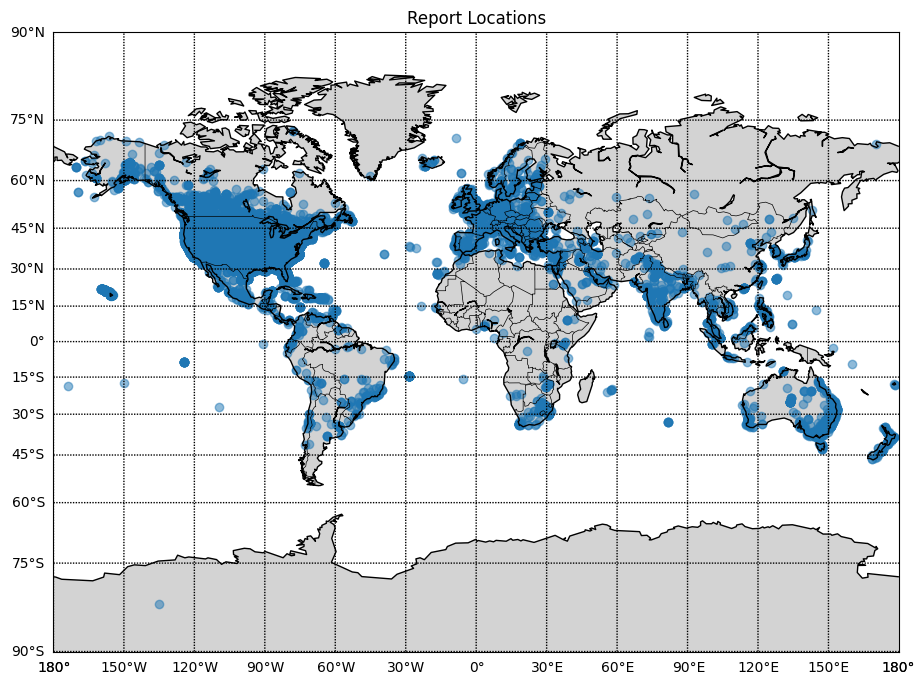

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig = plt.figure(figsize=(24, 24))

ax = fig.add_subplot(1, 2, 1)
m = Basemap(projection="mill", llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution="c", ax=ax)
m.drawcoastlines() ; m.drawcountries() ; m.fillcontinents(color="lightgray")
x, y = m(df["longitude"].values, df["latitude"].values) ; ax.scatter(x, y, alpha=0.5)
plt.title("Report Locations")
parallels = range(-90, 91, 15) ; meridians = range(-180, 181, 30)
m.drawparallels(parallels, labels=[True, False, False, False], fontsize=10)
m.drawmeridians(meridians, labels=[False, False, False, True], fontsize=10)

plt.show()


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.cm as cm
from matplotlib.lines import Line2D
import random

df_filtered = df

def get_legend_elements(color_source):
  if   color_source == "month":   legend_elements = [Line2D([0], [0], marker='o', color='w', label=month,   markerfacecolor=month_colors[month],     markersize=8) for month   in months]
  elif color_source == "weekday": legend_elements = [Line2D([0], [0], marker='o', color='w', label=weekday, markerfacecolor=weekday_colors[weekday], markersize=8) for weekday in weekdays]
  elif color_source == "hour":    legend_elements = [Line2D([0], [0], marker='o', color='w', label=hour,    markerfacecolor=weekday_colors[hour],    markersize=8) for hour    in hours]
  elif color_source == "shape":   legend_elements = [Line2D([0], [0], marker='o', color='w', label=shape,   markerfacecolor=shape_colors[shape],     markersize=8) for shape   in shapes]
  else:
    if(color_source == "year"):    colormap = year_colormap    ; norm = year_norm
    if(color_source == "seconds"): colormap = seconds_colormap ; norm = seconds_norm
    legend_elements = [plt.cm.ScalarMappable(norm=norm, cmap=colormap)]
  return legend_elements

def get_filtered_df():
    min_lat, max_lat = lat_slider.value
    min_lon, max_lon = lon_slider.value
    selected_countries = [box.description for box in country_checkboxes if box.value]
    selected_states = [box.description for box in state_checkboxes if box.value]
    selected_shapes = [box.description for box in shape_checkboxes if box.value]

    return df[(df["latitude"]  > min_lat) & (df["latitude"] < max_lat) &
              (df["longitude"] > min_lon) & (df["longitude"] < max_lon) &
              df['country'].isin(selected_countries) &
              df['state'].isin(selected_states) &
              df['shape'].isin(selected_shapes)]

def plot_map(min_lat, max_lat, min_lon, max_lon, size, alpha, color_source):

    global df_filtered
    df_filtered = get_filtered_df()
    comment_dropdown.options=df_filtered["comments"][:20].dropna().unique()

    fig = plt.figure(figsize=(16, 16))

    ax = fig.add_subplot(1, 2, 1)
    m = Basemap(projection="mill", llcrnrlat=min_lat, urcrnrlat=max_lat, llcrnrlon=min_lon, urcrnrlon=max_lon, resolution="c", ax=ax)
    m.drawcoastlines() ; m.drawcountries() ; m.fillcontinents(color="lightgray")
    x, y = m(df_filtered["longitude"].values, df_filtered["latitude"].values)
    ax.set_position([0.15, 0.1, 0.7, 0.8])
    plt.title("Report Locations")

    if color_source == "NONE":
      ax.scatter(x, y, s = size, alpha=alpha)
    else:
      color_values = df_filtered[color_source + "_color"]
      ax.scatter(x, y, s = size, alpha=alpha, c=color_values)

      legend_elements = get_legend_elements(color_source)
      if color_source in ["month", "weekday", "time", "shape"]:
        ax.legend(handles=legend_elements, loc='upper right', title='{} colors'.format(color_source))
      elif color_source in ["year", "seconds"]:
        cax = fig.add_axes([0.9, 0.3, 0.02, 0.4])
        cbar = plt.colorbar(legend_elements[0], cax=cax)
        cbar.set_label(color_source.capitalize() + ' Color')

    parallels = list(range(int(min_lat), int(max_lat)+1, max(1, int((max_lat-min_lat)/10))))
    meridians = list(range(int(min_lon), int(max_lon)+1, max(1, int((max_lon-min_lon)/10))))
    m.drawparallels(parallels, labels=[True, False, False, False], fontsize=10)
    m.drawmeridians(meridians, labels=[False, False, False, True], fontsize=10)

    plt.show()
    plt.close()

def plot_nlp():
    global df_filtered
    df_filtered = get_filtered_df()
    word_counts = df_filtered.iloc[:, 18:].apply(pd.to_numeric, errors='coerce').sum(axis=0)
    sorted_word_counts = word_counts.sort_values(ascending=False)
    top_n_words = 30
    sorted_word_counts = sorted_word_counts[:top_n_words]

    fig = plt.figure(figsize=(12, 5))
    ax = fig.gca()

    sorted_word_counts.plot(kind='bar', ax=ax)

    plt.title("Natural Language Frequency")
    plt.xlabel("Words")
    plt.ylabel("Frequency")

    plt.show()
    plt.close()

lat_slider = widgets.FloatRangeSlider(min=-90, max=90, step=1, value=(-90, 90), description="Latitude", orientation="vertical")
lat_slider.layout.height = '700px'
lon_slider = widgets.FloatRangeSlider(min=-180, max=180, step=1, value=(-180, 180), description="Longitude")
lon_slider.layout.width = '1025px'
spot_size_slider = widgets.FloatSlider(min=.1, max=5, step=.1, value=(.1), description="Size")
spot_alpha_slider = widgets.FloatSlider(min=.1, max=1, step=.1, value=(1), description="Alpha")
color_dropdown = widgets.Dropdown(
    options=["NONE", "year", "month", "weekday", "hour", "seconds", "shape"],
    value="NONE",
    description='Color',
    disabled=False)
update_button = widgets.Button(description="Update Map")
map_output = widgets.Output()
nlp_output = widgets.Output()

countries = df['country'].unique()
states = df['state'].unique()
shapes = df['shape'].unique()
countries.sort()
states.sort()
shapes.sort()
country_checkboxes = [widgets.Checkbox(value=True, description=country) for country in countries]
state_checkboxes = [widgets.Checkbox(value=True, description=state) for state in states]
shape_checkboxes = [widgets.Checkbox(value=True, description=shape) for shape in shapes]
all_checkboxes = [country_checkboxes, state_checkboxes, shape_checkboxes]

def check_uncheck_all(checkboxes, value):
    for checkbox in checkboxes:
        checkbox.value = value

check_all_country_button = widgets.Button(description="Check all")
check_all_country_button.on_click(lambda x: check_uncheck_all(country_checkboxes, True))
uncheck_all_country_button = widgets.Button(description="Uncheck all")
uncheck_all_country_button.on_click(lambda x: check_uncheck_all(country_checkboxes, False))
country_buttons = [check_all_country_button, uncheck_all_country_button]

check_all_state_button = widgets.Button(description="Check all")
check_all_state_button.on_click(lambda x: check_uncheck_all(state_checkboxes, True))
uncheck_all_state_button = widgets.Button(description="Uncheck all")
uncheck_all_state_button.on_click(lambda x: check_uncheck_all(state_checkboxes, False))
state_buttons = [check_all_state_button, uncheck_all_state_button]

check_all_shape_button = widgets.Button(description="Check all")
check_all_shape_button.on_click(lambda x: check_uncheck_all(shape_checkboxes, True))
uncheck_all_shape_button = widgets.Button(description="Uncheck all")
uncheck_all_shape_button.on_click(lambda x: check_uncheck_all(shape_checkboxes, False))
shape_buttons = [check_all_shape_button, uncheck_all_shape_button]

all_buttons = [country_buttons, state_buttons, shape_buttons]

hbox_layout = widgets.Layout(display='flex', align_items='center', justify_content='center', align_self='center')
vbox_layout = widgets.Layout(display='flex', align_items='center', justify_content='center', flex_flow='column', align_self='center')
lon_box = widgets.VBox([map_output, lon_slider], layout = vbox_layout)
lat_box = widgets.HBox([lat_slider, lon_box], layout = hbox_layout)
options_box = widgets.VBox([spot_size_slider, spot_alpha_slider, color_dropdown, update_button], layout = vbox_layout)
map_box = widgets.HBox([lat_box, options_box], layout = hbox_layout)

checkbox_layout = widgets.Layout(display='flex', flex_flow='row wrap', align_items='stretch', justify_content='center')
checkbox_rows = widgets.VBox(
    [widgets.HBox(buttons + checkboxes, layout = checkbox_layout) for (buttons, checkboxes) in zip(all_buttons, all_checkboxes)], layout = vbox_layout)

comment_dropdown = widgets.Dropdown(
    options=df_filtered["comments"].dropna().unique(),
    description='Comments:',
    disabled=False,
)

comment_output = widgets.Textarea(layout=widgets.Layout(width="1000px", height='100px'))

def on_dropdown_change(change):
    comment_output.value = change.new

comment_dropdown.observe(on_dropdown_change, names='value')

all_box = widgets.VBox([map_box, checkbox_rows, comment_dropdown, comment_output, nlp_output], layout = vbox_layout)

def on_button_click(button):
    with map_output:
        clear_output(wait=True)
        plot_map(lat_slider.value[0], lat_slider.value[1], lon_slider.value[0], lon_slider.value[1], spot_size_slider.value, spot_alpha_slider.value, color_dropdown.value)
    with nlp_output:
        clear_output(wait=True)
        plot_nlp()
update_button.on_click(on_button_click)

with map_output: plot_map(lat_slider.value[0], lat_slider.value[1], lon_slider.value[0], lon_slider.value[1], spot_size_slider.value, spot_alpha_slider.value, color_dropdown.value)
with nlp_output: plot_nlp()
display(all_box)